### Project 4: Logistic Regression on Titanic Dataset

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Step 2: Load Titanic Dataset

In [2]:
# Titanic dataset from seaborn
df = sns.load_dataset("titanic")
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## Step 3: Data Preprocessing

Select useful features: age, sex, pclass

Handle missing values (age)

Encode categorical variable (sex)

In [3]:
# Keep relevant features
titanic = df[["survived", "pclass", "sex", "age"]]

# Drop rows with missing age
titanic = titanic.dropna()

# Convert categorical variable "sex" into numeric (male=0, female=1)
titanic["sex"] = titanic["sex"].map({"male":0, "female":1})

print(titanic.head())


   survived  pclass  sex   age
0         0       3    0  22.0
1         1       1    1  38.0
2         1       3    1  26.0
3         1       1    1  35.0
4         0       3    0  35.0


## Step 4: Train-Test Split

In [4]:
X = titanic[["pclass", "sex", "age"]]
y = titanic["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 5: Build Logistic Regression Model

In [5]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [[-1.24873462  2.53219712 -0.04253228]]
Model Intercept: [2.63788212]


## Step 6: Predictions

In [6]:
y_pred = model.predict(X_test)

print("Predicted:", y_pred[:10])
print("Actual:", list(y_test[:10]))


Predicted: [0 1 1 1 0 0 1 1 1 1]
Actual: [0, 1, 1, 1, 0, 1, 1, 1, 0, 0]


## Step 7: Model Evaluation

In [7]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7482517482517482
Confusion Matrix:
 [[68 19]
 [17 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        87
           1       0.67      0.70      0.68        56

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143



## Step 8: Visualization

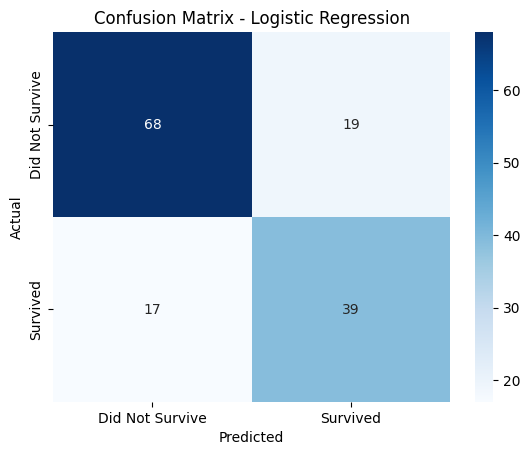

In [8]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Did Not Survive", "Survived"],
            yticklabels=["Did Not Survive", "Survived"])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


### ✅ Insights

Accuracy around 75–80% is typical with these basic features.

Sex is the most important predictor (females had higher survival).

Pclass (1st > 3rd) also plays a strong role.

Age has a smaller but still relevant effect.